In [0]:
url= https://njnitesh@bitbucket.org/njnitesh/self_driving_car_data.git

In [2]:
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mping

from keras.layers import Dense, Dropout, Flatten,Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import pickle
import pandas as pd
import random
import cv2 
import os 
import ntpath
plt.figure(figsize=(8,8))

Using TensorFlow backend.


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [3]:
!git clone https://njnitesh@bitbucket.org/njnitesh/self_driving_car_data.git

Cloning into 'self_driving_car_data'...
remote: Counting objects: 23195, done.
remote: Compressing objects: 100% (23195/23195), done.
remote: Total 23195 (delta 1), reused 23194 (delta 0)
Receiving objects: 100% (23195/23195), 318.03 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (23192/23192), done.


In [4]:
!ls self_driving_car_data/


driving_log1.csv  driving_log.csv  IMG	IMG1


In [5]:
datadir='self_driving_car_data'
column=['center','left','right','steering_angle','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=column)
data1=pd.read_csv(os.path.join(datadir,'driving_log1.csv'),names=column)

data.head(2)

center  ...     speed
0  C:\Users\Tushar\Downloads\self\IMG\center_2019...  ...  0.000078
1  C:\Users\Tushar\Downloads\self\IMG\center_2019...  ...  0.000078

[2 rows x 7 columns]

In [6]:
data1.head(2)

center  ...     speed
0  C:\Users\Tushar\Downloads\self1\IMG\center_201...  ...  3.556126
1  C:\Users\Tushar\Downloads\self1\IMG\center_201...  ...  3.570937

[2 rows x 7 columns]

In [0]:
data.center=data.center.apply(lambda x: x.split('\\')[-1])
data1.center=data1.center.apply(lambda x: x.split('\\')[-1])

In [8]:
data.head(2)

center  ...     speed
0  center_2019_06_12_17_54_36_075.jpg  ...  0.000078
1  center_2019_06_12_17_54_36_249.jpg  ...  0.000078

[2 rows x 7 columns]

In [9]:
data1.head(2)

center  ...     speed
0  center_2019_06_12_18_08_47_758.jpg  ...  3.556126
1  center_2019_06_12_18_08_47_858.jpg  ...  3.570937

[2 rows x 7 columns]

In [0]:
dt=data.loc[:,['center','steering_angle']]
dt1=data1.loc[:,['center','steering_angle']]

In [11]:
dt.head(2)

center  steering_angle
0  center_2019_06_12_17_54_36_075.jpg             0.0
1  center_2019_06_12_17_54_36_249.jpg             0.0

In [12]:
dt1.shape

(1406, 2)

In [0]:
num_bins=25
hist,bins=np.histogram(dt['steering_angle'],num_bins)
hist1,bins1=np.histogram(dt1['steering_angle'],num_bins)

In [14]:
print(hist)
print(bins)
print(hist1)
print(bins1)

[  18    5   13   28   66   34   79  174  253   69  109  189 4999   39
   25    9   70   56   20    8   27   17    4    1   12]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[ 41   8   8  15  25  25  29  43  62  28  42  48 846  26  11  18  49  17
  10  12  21   7   2   8   5]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [0]:
center=(bins[:-1]+bins[1:]*0.5)
center1=(bins1[:-1]+bins1[1:]*0.5)

In [16]:
print(center)
print(center1)

[-1.46 -1.34 -1.22 -1.1  -0.98 -0.86 -0.74 -0.62 -0.5  -0.38 -0.26 -0.14
 -0.02  0.1   0.22  0.34  0.46  0.58  0.7   0.82  0.94  1.06  1.18  1.3
  1.42]
[-1.46 -1.34 -1.22 -1.1  -0.98 -0.86 -0.74 -0.62 -0.5  -0.38 -0.26 -0.14
 -0.02  0.1   0.22  0.34  0.46  0.58  0.7   0.82  0.94  1.06  1.18  1.3
  1.42]


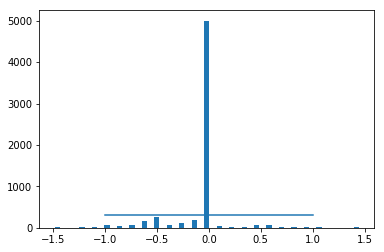

In [17]:
sample_per_bins=300
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dt['steering_angle']),np.max(dt['steering_angle'])),(sample_per_bins,sample_per_bins))

In [0]:
p=dt[(dt['steering_angle']>=-0.04) & (dt['steering_angle']<=0.04)]
p.count()
p.index[300:]
dt=dt.drop(p.index[300:])

In [19]:
dt.count()

center            1625
steering_angle    1625
dtype: int64

In [0]:
nhist,nbins=np.histogram(dt.steering_angle,num_bins)

In [0]:
center=(nbins[:-1]+nbins[1:]*0.5)

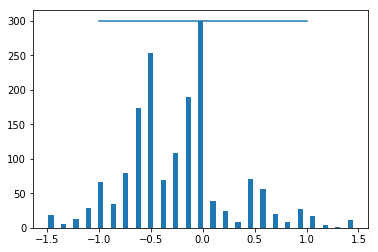

In [22]:
sample_per_bins=300
plt.bar(center,nhist,width=0.05)
plt.plot((np.min(dt['steering_angle']),np.max(dt['steering_angle'])),(sample_per_bins,sample_per_bins))

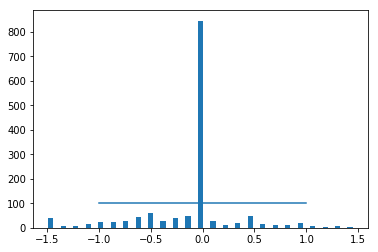

In [23]:
sample_per_bins=100
plt.bar(center1,hist1,width=0.05)
plt.plot((np.min(dt1['steering_angle']),np.max(dt1['steering_angle'])),(sample_per_bins,sample_per_bins))

In [0]:
p=dt1[(dt1['steering_angle']>=-0.04) & (dt1['steering_angle']<=0.04)]
p.count()
p.index[100:]
dt1=dt1.drop(p.index[100:])

In [25]:
dt1.count()

center            660
steering_angle    660
dtype: int64

In [0]:
nhist1,nbins1=np.histogram(dt1.steering_angle,num_bins)

In [0]:
center1=(nbins1[:-1]+nbins1[1:]*0.5)

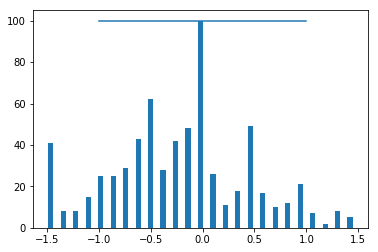

In [28]:

sample_per_bins=100
plt.bar(center1,nhist1,width=0.05)
plt.plot((np.min(dt1['steering_angle']),np.max(dt1['steering_angle'])),(sample_per_bins,sample_per_bins))

In [0]:
def load_img_steering(base_dir,dataframe):
    image_paths=[]
    steering_angle=[]
    #taking dataframe values as numpy
    center=dataframe.iloc[:,0].values
    angle=dataframe.iloc[:,1].values
    for i in range(len(dataframe)):
        image_paths.append(os.path.join(base_dir,center[i]))
        steering_angle.append(angle[i])
        
    #returnig the list an numpy array
    image_p=np.array(image_paths)
    angle_p=np.array(steering_angle)
    return image_p,angle_p

In [0]:
image_paths,steering=load_img_steering("self_driving_car_data/IMG",dt)
image_paths1,steering1=load_img_steering("self_driving_car_data/IMG1",dt1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(image_paths,steering,test_size=0.2, random_state=22)
print(f'Training sample = {len(x_train)} \nTest Sample = {len(x_test)}')
x_train1, x_test1, y_train1, y_test1 = train_test_split(image_paths1,steering1,test_size=0.2, random_state=22)
print(f'Training sample = {len(x_train1)} \nTest Sample = {len(x_test1)}')

Training sample = 1300 
Test Sample = 325
Training sample = 528 
Test Sample = 132


In [32]:
x_train.shape

(1300,)

Text(0.5, 1.0, 'Zoomed Image')

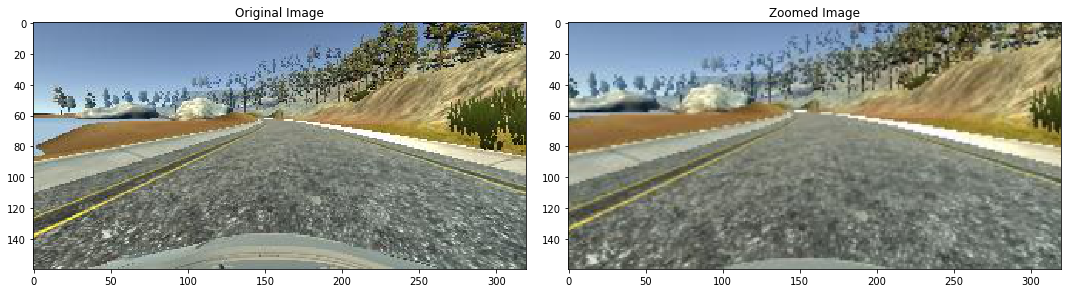

In [33]:
#definition
def zoom (image):
    zoom=iaa.Affine(scale=(1,1.3))
    image = zoom.augment_image(image)
    return image

#image selection
image = image_paths[random.randint(0,1000)]
original_image=mping.imread(image)

#function aplied
zoomed_image=zoom(original_image)


#plotting
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

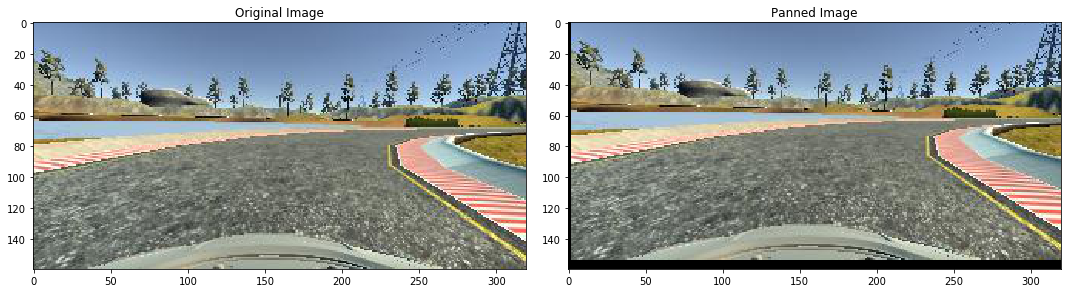

In [34]:
#definition
def pan(image):
    pan=iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
    image=pan.augment_image(image)
    return image

image=image_paths[random.randint(0,1000)]
original_image =mping.imread(image)
panned_image=pan(original_image)

fig,axs =plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered Image')

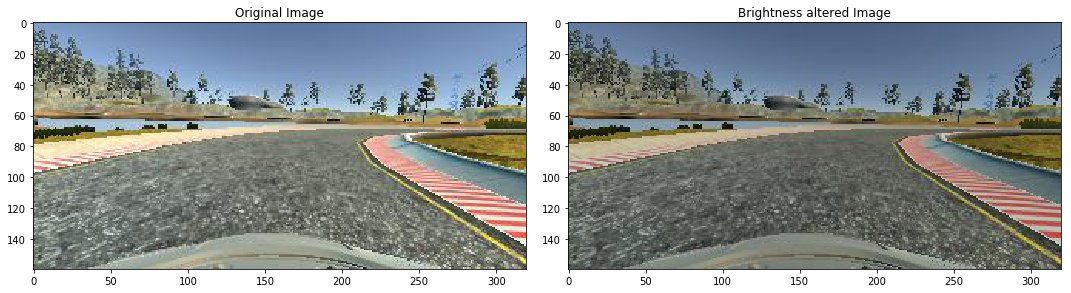

In [35]:
def img_random_brightness(image):
    brightness =iaa.Multiply((0.2,1.2))
    image = brightness.augment_image(image)
    return image
image= image_paths[random.randint(0,1000)]
original_image = mping.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered Image')


Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.3682915')

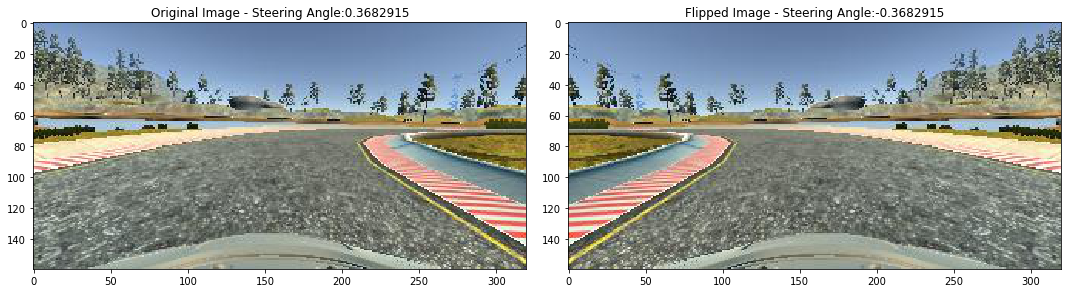

In [36]:
def img_random_flip(image,steering_angle):
    image=cv2.flip(image,1)
    steering_angle= -steering_angle
    return image,steering_angle

random_index=random.randint(0,1000)
image=image_paths[random_index]
steering_angle = steering[random_index]

oringinal_image=mping.imread(image)
flipped_image,flipped_steering_angle=img_random_flip(original_image,steering_angle)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' +str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' +str(flipped_steering_angle))



In [0]:
def random_augment(image, steering_angle):
    image=mping.imread(image)
    if np.random.rand()<0.5:
        image = pan(image)
    if np.random.rand()<0.5:
        image = zoom(image)
    if np.random.rand()<0.5:
        image = img_random_brightness(image)
    if np.random.rand()<0.5:
        image, steering_angle = img_random_flip(image,steering_angle)
    return image,steering_angle

In [38]:
type(steering)

numpy.ndarray

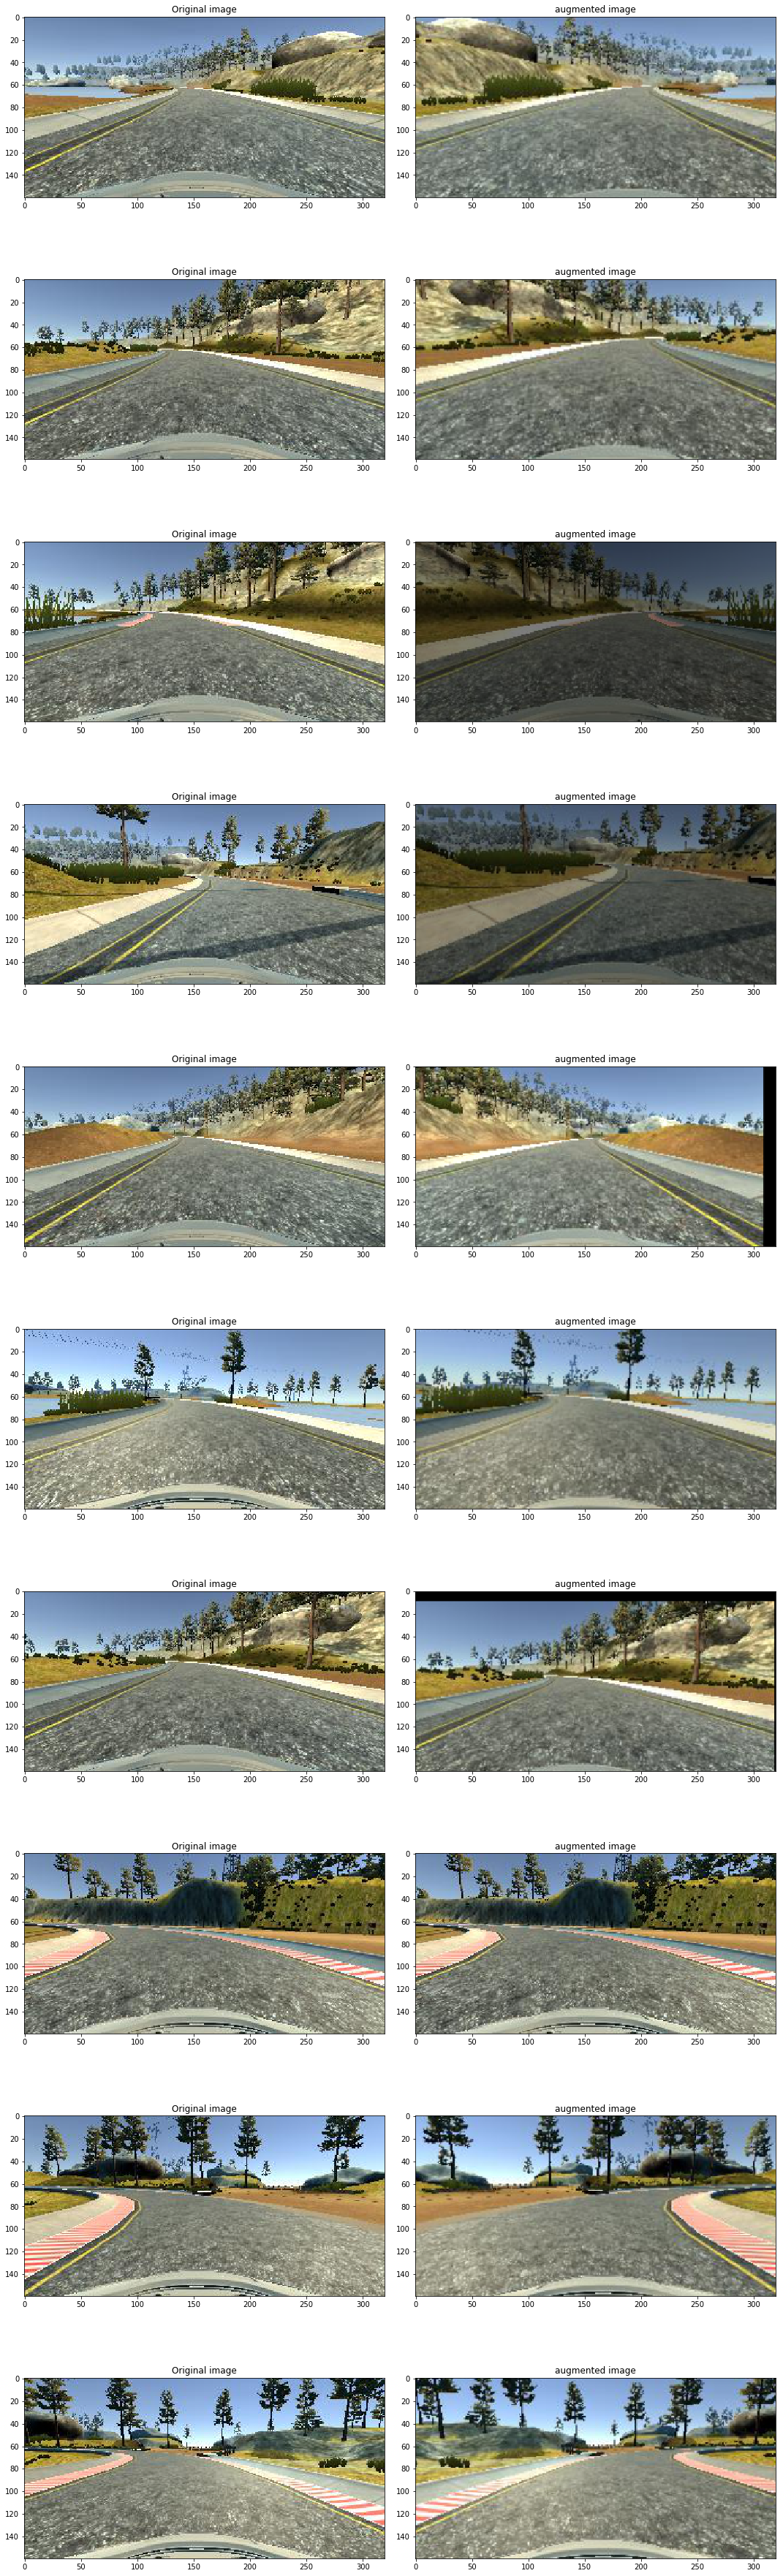

In [39]:
ncol=2
nrow=10
fig,axs=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
    randnum=random.randint(0,len(image_paths)-1)
    random_image=image_paths[randnum]
    random_steering=steering[randnum]
#     print(random_steering)
    original_image = mping.imread(random_image)
    augmented_image,steerings_= random_augment(random_image,random_steering)
    axs[i][0].imshow(original_image)
    axs[i][0].set_title('Original image')
    
    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title('augmented image')

In [0]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img =cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img/255
    return img



Text(0.5, 1.0, 'Preprocessed image')

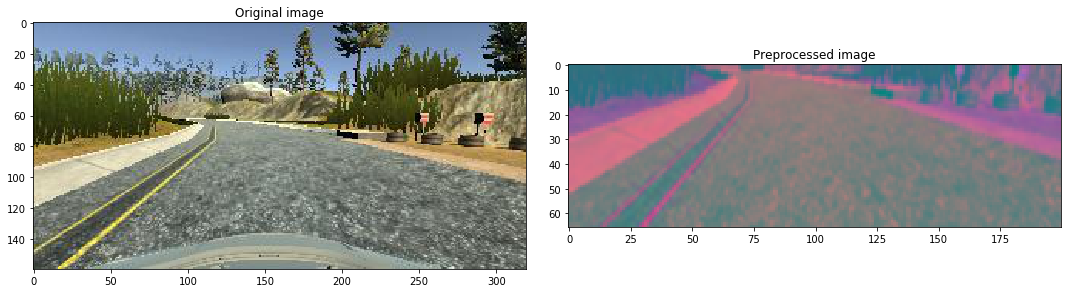

In [41]:
image=image_paths[100]
original_image=mping.imread(image)
preprocessed_image = img_preprocess(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')
    
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')


In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img =[]
        batch_steering=[]
        
        for i in range(batch_size):
            random_index = random.randint(0,len(image_paths)-1)
            if istraining:
                im, steering1 = random_augment(image_paths[random_index], steering_ang[random_index])
                
            else :
                im =mping.imread(image_paths[random_index])
                steering1 = steering_ang[random_index]
                
            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering1)
            
        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [0]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation = 'elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(50, activation = 'elu'))
    #model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'elu'))
    #model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = Adam(lr=1e-4)
    model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
    return model

In [44]:
len(y_train)

1300

In [45]:
model = nvidia_model()
print(model.summary())

W0617 12:13:34.605698 139884309182336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
W0617 12:13:34.642383 139884309182336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 12:13:34.653340 139884309182336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

In [46]:
history = model.fit_generator(batch_generator(x_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=5,
                                  validation_data=batch_generator(x_test, y_test, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)


W0617 12:13:35.214037 139884309182336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0617 12:13:35.480276 139884309182336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/5
300/300 [==============================] - 165s 548ms/step - loss: 0.1116 - acc: 0.1779 - val_loss: 0.0861 - val_acc: 0.2108
Epoch 2/5
300/300 [==============================] - 159s 530ms/step - loss: 0.0926 - acc: 0.1754 - val_loss: 0.0720 - val_acc: 0.2053
Epoch 3/5
300/300 [==============================] - 159s 531ms/step - loss: 0.0804 - acc: 0.1749 - val_loss: 0.0682 - val_acc: 0.2032
Epoch 4/5
300/300 [==============================] - 159s 529ms/step - loss: 0.0748 - acc: 0.1738 - val_loss: 0.0646 - val_acc: 0.2127
Epoch 5/5
300/300 [==============================] - 159s 529ms/step - loss: 0.0690 - acc: 0.1763 - val_loss: 0.0585 - val_acc: 0.2137


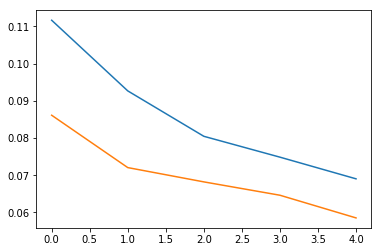

In [47]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])


In [0]:
model.save('model3.h5')

In [0]:
from google.colab import files
files.download('model3.h5')